## Aula 05 - K-Nearest Neighbors

---

Vamos iniciar carregando os dados, embaralhando as amostras, e separando 100 amostras para teste e 50 amostras para treino,

In [2]:
import numpy as np
import pandas as pd

df_dataset = pd.read_csv('data/iris.csv', sep=',', index_col=None)

In [3]:
df_dataset.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.utils import shuffle
df_dataset = shuffle(df_dataset, random_state=42)

In [5]:
df_dataset.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor


In [6]:
treino = df_dataset[:100].values
teste = df_dataset[100:].values

print(treino.shape)
print(teste.shape)

(100, 5)
(50, 5)


---

Em seguida, vamos dar início à implementação do algoritmo KNN. O algoritmo funciona basicamente nas seguintes etapas:

- Calcular a distância de uma amostra para todas as demais;
- Pegar as n amostras mais próximas;
- Computar qual a classe mais frequente.

### Calculando a distância

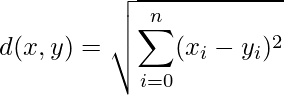

In [7]:
amostra_teste = teste[0,:4]
amostra_treino = treino[0,:4]

print(amostra_teste)
print(amostra_treino)
print(amostra_treino - amostra_teste)
print((amostra_treino - amostra_teste) ** 2)
print(np.sum((amostra_treino - amostra_teste) ** 2))

distancia = np.sum((amostra_treino - amostra_teste) ** 2) ** 0.5
print("Distância entre duas amostras quaisquer:", distancia)

[4.6 3.1 1.5 0.2]
[6.1 2.8 4.7 1.2]
[1.5 -0.30000000000000027 3.2 1.0]
[2.25 0.09000000000000016 10.240000000000002 1.0]
13.580000000000002
Distância entre duas amostras quaisquer: 3.685105154537656


Também é possível calcular a distância para todas as amostras de uma só vez.

In [10]:
distancias = np.sum((amostra_teste - treino[:,:4]) ** 2, axis=1) ** 0.5
print("Distâncias de uma amostra de teste para todas as amostras de treino:")
print(distancias)
print(distancias.shape)

Distâncias de uma amostra de teste para todas as amostras de treino:
[3.685105154537656 1.3228756555322956 6.590144156238162 3.5623026261113755
 4.154515615568198 0.8774964387392128 2.5806975801127883 4.760252094164762
 3.749666651850535 2.891366458960192 4.451965857910413 0.26457513110645925
 1.0049875621120892 0.3162277660168386 0.8660254037844384
 3.889730067755345 5.109794516416487 2.816025568065745 3.3926390907374753
 4.913247398615299 0.17320508075688812 4.047221268969612
 0.5477225575051663 4.873397172404482 6.215303693304134 4.7455242070818695
 5.081338406365 5.349766350038103 0.26457513110645925 0.22360679774997916
 0.7071067811865476 1.714642819948225 3.776241517699842 0.3741657386773941
 0.29999999999999954 4.288356328478313 3.733630940518894
 0.7211102550927982 0.6480740698407862 1.1704699910719625
 4.177319714841084 3.606937759374287 4.042276586281548 1.1661903789690604
 1.0000000000000007 2.6038433132583076 4.198809355043403 4.669047011971501
 3.722902093797257 5.78446194

---

Em seguida, escolhemos quantos vizinhos vamos considerar e escolhemos os mais próximos da amostra avaliada.
A partir dos índices encontrados, calculamos qual é a classe mais frequente e atribuímos à amostra.

In [12]:
k = 5
indices = distancias.argsort()[:k] # argsort > retorna os indices dos elemetos ordenados
print("Indices dos vizinhos mais próximos:", indices)

Indices dos vizinhos mais próximos: [68 20 29 11 28]


In [13]:
from collections import Counter

vizinhos = treino[indices,4]
print("Vizinhos mais próximos:", vizinhos)

print(Counter(vizinhos).most_common(1))

classe = Counter(vizinhos).most_common(1)[0][0]
print("Classe mais frequente e quantidade:", Counter(vizinhos).most_common(1)[0][0])

Vizinhos mais próximos: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
[('Iris-setosa', 5)]
Classe mais frequente e quantidade: Iris-setosa


---

Para verificar se a classe encontrada pelo modelo está correta, basta comparar a saída com o rótulo da amostra.

In [14]:
classe_certa = teste[0, 4]
print(classe_certa)
if classe_certa == classe:
    print("Correto")
else:
    print("Errado")

Iris-setosa
Correto


---

## Exercícios

### Utilizando as funções do scikit-learn para separar dados e treinar automaticamente o KNN, implemente as duas variações do Edit-KNN (para reduzir a base de dados). Em seguida, avalie o tamanho da base e o resultado de acurácia:

In [27]:
# implemente seu código aqui


import pandas as pd
from sklearn.model_selection import train_test_split

data = "data/iris.csv"
df = pd.read_csv(data, sep=",", index_col=None)

X = df.drop(columns=['classe'])
y = df.classe

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

df

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [49]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


arr = []

for i in range(len(X_train)):
    # print(i, X_train.iloc[i])
    arr.append(True)
    
    
for n in range(len(X_train)):
    arr[i] = False
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train[arr], y_train[arr])
    
    
    pred = knn.predict([X_train.values[n]])
    pred = knn.predict([X_train.values[i]])
    if pred != y_train.values[i]:
        indices[i] = True
# print(arr, len(arr))


model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train[indices], y_train[indices])
pred = model.predict(X_test)

C:\Users\plech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\plech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\plech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\plech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py

KeyError: "None of [Index([0, 0, 0, 0, 0], dtype='int64')] are in the [columns]"